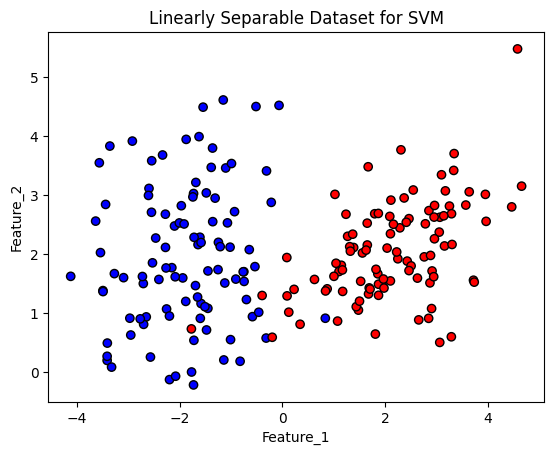

In [11]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0,          # ensures linear separability
    class_sep=2,       # larger = more separable
    random_state=42
)

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

# Visualization
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'], cmap='bwr', edgecolor='k')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Linearly Separable Dataset for SVM')
plt.show()

Accuracy: 0.97
Confusion Matrix:
[[22  1]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



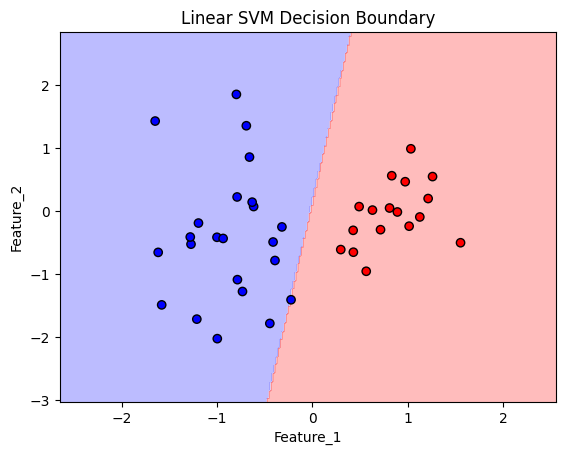

In [7]:
# -----------------------------
# Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df[['Feature_1', 'Feature_2']], df['Target'], test_size=0.2, random_state=42
)

# -----------------------------
# Scale Features (Important for SVM)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Train Linear SVM
# -----------------------------
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# -----------------------------
# Make Predictions
# -----------------------------
y_pred = svm_model.predict(X_test_scaled)

# -----------------------------
#  Evaluate Accuracy
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# -----------------------------
#  Plot Decision Boundary
# -----------------------------
import numpy as np

def plot_svm_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    X = X.values if isinstance(X, pd.DataFrame) else X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Feature_1')
    plt.ylabel('Feature_2')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_svm_boundary(svm_model, X_test_scaled, y_test)
